In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from bs4 import BeautifulSoup
import requests
import re
import json

In [6]:
# scrapping movie data from 'the numbers'
def movie_data(num):
    url=requests.get('https://www.the-numbers.com/movie/budgets/all/{}'.format(num))
    return BeautifulSoup(url.content, 'html.parser')  



In [7]:
# create emply list for 1000 data
list1=[]
for i in list(range(1,1000,100)):
    list1.append(movie_data(i))
list1

[<!DOCTYPE html>
 
 <html>
 <head>
 <!-- Global site tag (gtag.js) - Google Analytics -->
 <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-1343128-1"></script>
 <script>
   window.dataLayer = window.dataLayer || [];
   function gtag(){dataLayer.push(arguments);}
   gtag('js', new Date());
 
   gtag('config', 'UA-1343128-1');
 </script>
 <meta content='(PICS-1.1 "https://www.icra.org/ratingsv02.html" l gen true for "https://www.the-numbers.com/" r (cb 1 lz 1 nz 1 oz 1 vz 1) "https://www.rsac.org/ratingsv01.html" l gen true for "https://www.the-numbers.com/" r (n 0 s 0 v 0 l 0))' http-equiv="PICS-Label"/>
 <!--<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" >-->
 <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 <meta content="telephone=no" name="format-detection"/> <!-- for apple mobile -->
 <meta content="521546213" property="fb:admins">
 <meta content="initial-scale=1" name="viewport"/>
 <meta content="The budget of (nea

In [8]:
# find all data with <tr>
list1[0].find_all('tr')

[<tr><th> </th><th>Release<br/>Date</th><th>Movie</th><th>Production<br/>Budget</th><th>Domestic<br/>Gross</th><th>Worldwide<br/>Gross</th></tr>,
 <tr><td class="data">1</td>
 <td><a href="/box-office-chart/daily/2019/04/23">Apr 23, 2019</a></td>
 <td><b><a href="/movie/Avengers-Endgame-(2019)#tab=summary">Avengers: Endgame</a></b></td>
 <td class="data"> $400,000,000</td>
 <td class="data"> $858,373,000</td>
 <td class="data"> $2,797,800,564</td>
 </tr>,
 <tr><td class="data">2</td>
 <td><a href="/box-office-chart/daily/2011/05/20">May 20, 2011</a></td>
 <td><b><a href="/movie/Pirates-of-the-Caribbean-On-Stranger-Tides#tab=summary">Pirates of the Caribbean: On Stranger Tides</a></b></td>
 <td class="data"> $379,000,000</td>
 <td class="data"> $241,063,875</td>
 <td class="data"> $1,045,663,875</td>
 </tr>,
 <tr><td class="data">3</td>
 <td><a href="/box-office-chart/daily/2015/04/22">Apr 22, 2015</a></td>
 <td><b><a href="/movie/Avengers-Age-of-Ultron#tab=summary">Avengers: Age of Ult

In [9]:
# After that, find all data with <td> and set an empty list to fill in the selected data.    
data=[]
for m in list1:
    k=m.findAll('td')
    for j in k:
        data.append(j.text)
data

['1',
 'Apr 23, 2019',
 'Avengers: Endgame',
 '\xa0$400,000,000',
 '\xa0$858,373,000',
 '\xa0$2,797,800,564',
 '2',
 'May 20, 2011',
 'Pirates of the Caribbean: On Stranger Tides',
 '\xa0$379,000,000',
 '\xa0$241,063,875',
 '\xa0$1,045,663,875',
 '3',
 'Apr 22, 2015',
 'Avengers: Age of Ultron',
 '\xa0$365,000,000',
 '\xa0$459,005,868',
 '\xa0$1,403,013,963',
 '4',
 'Dec 16, 2015',
 'Star Wars Ep. VII: The Force Awakens',
 '\xa0$306,000,000',
 '\xa0$936,662,225',
 '\xa0$2,068,223,624',
 '5',
 'Apr 25, 2018',
 'Avengers: Infinity War',
 '\xa0$300,000,000',
 '\xa0$678,815,482',
 '\xa0$2,048,359,754',
 '6',
 'May 24, 2007',
 'Pirates of the Caribbean: At Worldâ\x80\x99s End',
 '\xa0$300,000,000',
 '\xa0$309,420,425',
 '\xa0$963,420,425',
 '7',
 'Nov 13, 2017',
 'Justice League',
 '\xa0$300,000,000',
 '\xa0$229,024,295',
 '\xa0$655,945,209',
 '8',
 'Oct 6, 2015',
 'Spectre',
 '\xa0$300,000,000',
 '\xa0$200,074,175',
 '\xa0$879,620,923',
 '9',
 'Dec 18, 2019',
 'Star Wars: The Rise of Skywa

In [10]:
# each movie contains 6 lines of data, so the total len(data) for 1000 movie is 6000.
# set index to the first item in the list. (len(index) becomes 6000/6=1000)
index=[]
for i in list(range(0,6000,6)):
    index.append(data[i])
len(index)    

1000

In [11]:
# set date to the second item in the list.
date=[]
for i in list(range(1,6000,6)):
    date.append(data[i])
date

['Apr 23, 2019',
 'May 20, 2011',
 'Apr 22, 2015',
 'Dec 16, 2015',
 'Apr 25, 2018',
 'May 24, 2007',
 'Nov 13, 2017',
 'Oct 6, 2015',
 'Dec 18, 2019',
 'May 23, 2018',
 'Mar 7, 2012',
 'Mar 23, 2016',
 'Jul 11, 2019',
 'Nov 24, 2010',
 'May 4, 2007',
 'Apr 22, 2016',
 'Jul 15, 2009',
 'Dec 13, 2013',
 'Dec 10, 2014',
 'Apr 7, 2017',
 'Apr 10, 2020',
 'Dec 17, 2009',
 'Jun 28, 2006',
 'Jul 19, 2012',
 'May 23, 2017',
 'Nov 14, 2008',
 'Apr 25, 2012',
 'Jul 7, 2006',
 'Jun 14, 2013',
 'May 16, 2008',
 'Jul 2, 2013',
 'Jul 17, 2020',
 'Jun 27, 2012',
 'Apr 11, 2012',
 'Jun 20, 2017',
 'Jun 9, 2015',
 'May 23, 2012',
 'Jun 24, 2009',
 'Jun 25, 2014',
 'May 26, 2006',
 'May 14, 2010',
 'Dec 14, 2005',
 'Dec 7, 2007',
 'Feb 13, 2018',
 'Dec 19, 1997',
 'Dec 13, 2017',
 'Jun 15, 2018',
 'Dec 14, 2016',
 'Jun 16, 2016',
 'Jun 20, 2019',
 'Jun 18, 2010',
 'Apr 24, 2013',
 'Apr 28, 2017',
 'Jun 30, 2004',
 'Mar 5, 2010',
 'Oct 26, 2012',
 'Dec 11, 2012',
 'Jun 21, 2013',
 'Mar 8, 2013',
 'May 2

In [12]:
# set name to the third item in the list.
name=[]
for i in list(range(2,6000,6)):
    name.append(data[i])
name

['Avengers: Endgame',
 'Pirates of the Caribbean: On Stranger Tides',
 'Avengers: Age of Ultron',
 'Star Wars Ep. VII: The Force Awakens',
 'Avengers: Infinity War',
 'Pirates of the Caribbean: At Worldâ\x80\x99s End',
 'Justice League',
 'Spectre',
 'Star Wars: The Rise of Skywalker',
 'Solo: A Star Wars Story',
 'John Carter',
 'Batman v Superman: Dawn of Justice',
 'The Lion King',
 'Tangled',
 'Spider-Man 3',
 'Captain America: Civil War',
 'Harry Potter and the Half-Blood Prince',
 'The Hobbit: The Desolation of Smaug',
 'The Hobbit: The Battle of the Five Armies',
 'The Fate of the Furious',
 'No Time to Die',
 'Avatar',
 'Superman Returns',
 'The Dark Knight Rises',
 'Pirates of the Caribbean: Dead Men Tell No Tales',
 'Quantum of Solace',
 'The Avengers',
 'Pirates of the Caribbean: Dead Manâ\x80\x99s Chest',
 'Man of Steel',
 'The Chronicles of Narnia: Prince Caspian',
 'The Lone Ranger',
 'Tenet',
 'The Amazing Spider-Man',
 'Battleship',
 'Transformers: The Last Knight',
 'J

In [13]:
# set budget to the fourth item in the list.
budget=[]
for i in list(range(3,6000,6)):
    budget.append(data[i][2:])
budget
# budget1 = list(map(int, budget))


['400,000,000',
 '379,000,000',
 '365,000,000',
 '306,000,000',
 '300,000,000',
 '300,000,000',
 '300,000,000',
 '300,000,000',
 '275,000,000',
 '275,000,000',
 '263,700,000',
 '263,000,000',
 '260,000,000',
 '260,000,000',
 '258,000,000',
 '250,000,000',
 '250,000,000',
 '250,000,000',
 '250,000,000',
 '250,000,000',
 '250,000,000',
 '237,000,000',
 '232,000,000',
 '230,000,000',
 '230,000,000',
 '230,000,000',
 '225,000,000',
 '225,000,000',
 '225,000,000',
 '225,000,000',
 '225,000,000',
 '224,000,000',
 '220,000,000',
 '220,000,000',
 '217,000,000',
 '215,000,000',
 '215,000,000',
 '210,000,000',
 '210,000,000',
 '210,000,000',
 '210,000,000',
 '207,000,000',
 '205,000,000',
 '200,000,000',
 '200,000,000',
 '200,000,000',
 '200,000,000',
 '200,000,000',
 '200,000,000',
 '200,000,000',
 '200,000,000',
 '200,000,000',
 '200,000,000',
 '200,000,000',
 '200,000,000',
 '200,000,000',
 '200,000,000',
 '200,000,000',
 '200,000,000',
 '200,000,000',
 '200,000,000',
 '200,000,000',
 '200,00

In [14]:
# set domestic_gross to the fifth item in the list.
domestic_gross=[]
for i in list(range(4,6000,6)):
    domestic_gross.append(data[i][2:])
domestic_gross

['858,373,000',
 '241,063,875',
 '459,005,868',
 '936,662,225',
 '678,815,482',
 '309,420,425',
 '229,024,295',
 '200,074,175',
 '507,768,463',
 '213,767,512',
 '73,058,679',
 '330,360,194',
 '543,638,043',
 '200,821,936',
 '336,530,303',
 '408,084,349',
 '302,089,278',
 '258,241,522',
 '255,119,788',
 '225,764,765',
 '0',
 '760,507,625',
 '200,120,000',
 '448,139,099',
 '172,558,876',
 '169,368,427',
 '623,357,910',
 '423,315,812',
 '291,045,518',
 '141,621,490',
 '89,302,115',
 '0',
 '262,030,663',
 '65,233,400',
 '130,168,683',
 '652,270,625',
 '179,020,854',
 '402,111,870',
 '245,439,076',
 '234,362,462',
 '105,487,148',
 '218,080,025',
 '70,107,728',
 '700,059,566',
 '659,363,944',
 '620,181,382',
 '608,581,744',
 '532,177,324',
 '486,295,561',
 '434,038,008',
 '415,004,880',
 '408,992,272',
 '389,813,101',
 '373,524,485',
 '334,191,110',
 '304,360,277',
 '303,003,568',
 '268,488,329',
 '234,770,996',
 '233,921,534',
 '202,853,933',
 '191,450,875',
 '173,956,935',
 '172,062,763',


In [15]:
# set international_gross to the sixth item in the list.
international_gross=[]
for i in list(range(5,6000,6)):
    international_gross.append(data[i][2:])
international_gross

['2,797,800,564',
 '1,045,663,875',
 '1,403,013,963',
 '2,068,223,624',
 '2,048,359,754',
 '963,420,425',
 '655,945,209',
 '879,620,923',
 '1,058,768,463',
 '393,151,347',
 '282,778,100',
 '873,634,919',
 '1,656,313,097',
 '586,477,240',
 '894,860,230',
 '1,153,284,349',
 '935,213,767',
 '960,241,522',
 '945,577,621',
 '1,238,764,765',
 '0',
 '2,789,705,275',
 '391,081,192',
 '1,084,439,099',
 '788,241,137',
 '591,692,078',
 '1,518,812,988',
 '1,066,215,812',
 '667,999,518',
 '417,341,288',
 '260,002,115',
 '0',
 '757,890,267',
 '313,477,717',
 '602,893,340',
 '1,648,854,864',
 '654,213,485',
 '836,519,699',
 '1,104,054,072',
 '459,260,946',
 '322,459,006',
 '550,517,357',
 '367,262,558',
 '1,346,913,161',
 '2,208,208,395',
 '1,332,539,889',
 '1,242,805,359',
 '1,056,057,273',
 '1,028,570,889',
 '1,073,394,813',
 '1,068,879,522',
 '1,215,392,272',
 '869,113,101',
 '795,110,670',
 '1,025,491,110',
 '1,110,526,981',
 '1,017,003,568',
 '743,588,329',
 '490,359,051',
 '747,862,775',
 '708,

In [16]:
# combine all data above to create a dataframe and drop index after that.
dm=pd.DataFrame(list(zip(index, date, name, budget, domestic_gross, international_gross))).drop(columns=0)

In [17]:
# check shape
dm.shape

(1000, 5)

In [22]:
#sort the table by budget asc. 
dm.columns = ['date','name','budget','domestic_gross','international_gross']
dm_sort=dm.sort_values(by='budget', ascending=False)
dm_sort

,date,name,budget,domestic_gross,international_gross
0,"Apr 23, 2019",Avengers: Endgame,400000000.0,858373000.0,2.797801e+09
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000.0,241063875.0,1.045664e+09
2,"Apr 22, 2015",Avengers: Age of Ultron,365000000.0,459005868.0,1.403014e+09
3,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.068224e+09
4,"Apr 25, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048360e+09
...,...,...,...,...,...
986,"Oct 14, 2015",Goosebumps,58000000.0,80069458.0,1.589053e+08
984,"Feb 9, 2016",Deadpool,58000000.0,363070709.0,8.010256e+08
997,"May 30, 2008",Sex and the City,57500000.0,152647258.0,4.152473e+08
998,"Sep 10, 2010",Resident Evil: Afterlife,57500000.0,60128566.0,2.958742e+08


In [19]:
# change str in budget to float
dm['budget'] = dm['budget'].str.replace(',', '').astype(float)

In [20]:
# change str in domestic_gross to float
dm['domestic_gross'] = dm['domestic_gross'].str.replace(',', '').astype(float)

In [21]:
# change str in international_gross to float
dm['international_gross'] = dm['international_gross'].str.replace(',', '').astype(float)

In [23]:
# check first 10
dm_sort.head(10)

,date,name,budget,domestic_gross,international_gross
0,"Apr 23, 2019",Avengers: Endgame,400000000.0,858373000.0,2.797801e+09
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000.0,241063875.0,1.045664e+09
2,"Apr 22, 2015",Avengers: Age of Ultron,365000000.0,459005868.0,1.403014e+09
3,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.068224e+09
4,"Apr 25, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048360e+09
5,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08
6,"Nov 13, 2017",Justice League,300000000.0,229024295.0,6.559452e+08
7,"Oct 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08
8,"Dec 18, 2019",Star Wars: The Rise of Skywalker,275000000.0,507768463.0,1.058768e+09
9,"May 23, 2018",Solo: A Star Wars Story,275000000.0,213767512.0,3.931513e+08


/Users/chaoalex/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chaoalex/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chaoalex/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/chaoalex/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


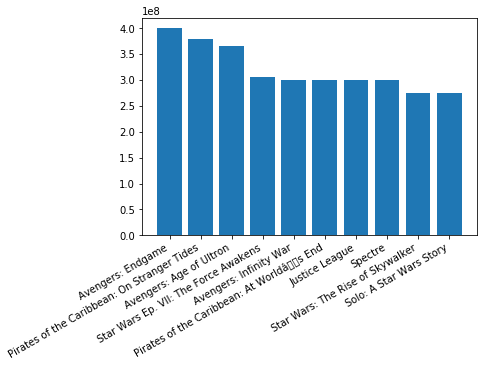

In [44]:
'ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー'

'ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー'

In [28]:
# web scrape again for more data 
def call_individual(web):
    url='https://www.the-numbers.com'+ web
    r=requests.get(url)
    soup=BeautifulSoup(r.content, 'html.parser')
    return soup

In [29]:
# find each row of data followed by <b><a><href> to get each url after https://www.the-numbers.com
in_web=[]
for i in range(0,len(list1)):
    for j in list1[i].find_all('tr'):
        if str(type(j.find('b')))!="<class 'NoneType'>":
            in_web.append(j.find('b').find('a').attrs['href'])
in_web

['/movie/Avengers-Endgame-(2019)#tab=summary',
 '/movie/Pirates-of-the-Caribbean-On-Stranger-Tides#tab=summary',
 '/movie/Avengers-Age-of-Ultron#tab=summary',
 '/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=summary',
 '/movie/Avengers-Infinity-War#tab=summary',
 '/movie/Pirates-of-the-Caribbean-At-Worlds-End#tab=summary',
 '/movie/Justice-League-(2017)#tab=summary',
 '/movie/Spectre#tab=summary',
 '/movie/Star-Wars-The-Rise-of-Skywalker-(2019)#tab=summary',
 '/movie/Solo-A-Star-Wars-Story#tab=summary',
 '/movie/John-Carter-of-Mars#tab=summary',
 '/movie/Batman-v-Superman-Dawn-of-Justice#tab=summary',
 '/movie/Lion-King-The-(Live-Action)-(2019)#tab=summary',
 '/movie/Tangled#tab=summary',
 '/movie/Spider-Man-3#tab=summary',
 '/movie/Captain-America-Civil-War#tab=summary',
 '/movie/Harry-Potter-and-the-Half-Blood-Prince#tab=summary',
 '/movie/Hobbit-The-Desolation-of-Smaug-The#tab=summary',
 '/movie/Hobbit-The-Battle-of-the-Five-Armies-The#tab=summary',
 '/movie/Fate-of-the-Furious-The#t

In [31]:
# add https://www.the-numbers.com back to make each url the full url and then find all with <tr>
in_web[0]
url='https://www.the-numbers.com'+ in_web[0]
r=requests.get(url)
soup=BeautifulSoup(r.content, 'html.parser')
soup.findAll('tr')

[<tr class="heading">
 <td colspan="3"><b>Theatrical Performance</b></td>
 </tr>, <tr>
 <td><b>Domestic Box Office</b></td>
 <td class="data">$858,373,000</td><td><a href="#tab=box-office">Details</a></td>
 </tr>, <tr>
 <td><b>International Box Office</b></td>
 <td class="data sum">$1,939,427,564</td><td><a href="#tab=international">Details</a></td>
 </tr>, <tr>
 <td><b>Worldwide Box Office</b></td>
 <td class="data">$2,797,800,564</td><td></td>
 </tr>, <tr class="heading">
 <td class="headed" colspan="3"><b>Home Market Performance</b></td>
 </tr>, <tr>
 <td><b>Est. Domestic DVD Sales</b></td>
 <td class="data">$17,872,667</td>
 <td><a href="#tab=video-sales">Details</a></td>
 </tr>, <tr>
 <td><b>Est. Domestic Blu-ray Sales</b></td>
 <td class="data sum">$67,775,935</td>
 <td><a href="#tab=video-sales">Details</a></td>
 </tr>, <tr>
 <td><b>Total Est. Domestic Video Sales</b></td>
 <td class="data">$85,648,602</td><td></td>
 </tr>, <tr class="heading"><td class="headed" colspan="3"><a h

In [30]:
# get each movies' genre from each url and put them in a new list 'genre'
genre=[]

for web in in_web[:(len(in_web))]:
#     print(in_web)
    soup = call_eachpage(web)
    for i in range(len(soup.findAll('td')[:100])):
#         print(i)
        if soup.findAll('td')[i].text == 'Genre:':
            genre.append(call_eachpage(web).findAll('td')[i+1].text)
    
    
genre   


['Action',
 'Adventure',
 'Action',
 'Adventure',
 'Action',
 'Adventure',
 'Action',
 'Action',
 'Adventure',
 'Adventure',
 'Adventure',
 'Action',
 'Adventure',
 'Musical',
 'Adventure',
 'Action',
 'Adventure',
 'Adventure',
 'Adventure',
 'Action',
 'Action',
 'Action',
 'Adventure',
 'Action',
 'Adventure',
 'Action',
 'Action',
 'Adventure',
 'Action',
 'Adventure',
 'Western',
 'Action',
 'Adventure',
 'Action',
 'Action',
 'Action',
 'Adventure',
 'Action',
 'Action',
 'Action',
 'Action',
 'Adventure',
 'Adventure',
 'Action',
 'Thriller/Suspense',
 'Adventure',
 'Adventure',
 'Adventure',
 'Adventure',
 'Adventure',
 'Adventure',
 'Action',
 'Action',
 'Adventure',
 'Adventure',
 'Action',
 'Adventure',
 'Adventure',
 'Adventure',
 'Action',
 'Action',
 'Adventure',
 'Action',
 'Adventure',
 'Action',
 'Adventure',
 'Action',
 'Action',
 'Action',
 'Action',
 'Action',
 'Adventure',
 'Adventure',
 'Action',
 'Adventure',
 'Action',
 'Drama',
 'Drama',
 'Action',
 'Adventure'

In [34]:
len(genre)

999

In [32]:
production_company=[]

for web in in_web[:(len(in_web))]:
#     print(in_web)
    soup = call_eachpage(web)
    for i in range(len(soup.findAll('td')[:100])):
#         print(i)
        if soup.findAll('td')[i].text == 'Production Companies:':
            production_company.append(call_eachpage(web).findAll('td')[i+1].text)
    
    
production_company

['Marvel Studios',
 'Walt Disney Pictures',
 'Marvel Studios',
 'Lucasfilm, Bad Robot',
 'Marvel Studios',
 'Walt Disney Pictures, Jerry Bruckheimer',
 'DC Films, RatPac Entertainment, Atlas Entertainment, Cruel and Unusual Films',
 'Eon Productions',
 'Lucasfilm, Bad Robot, Walt Disney Pictures',
 'Lucasfilm',
 'Walt Disney Pictures, Jim Morris',
 'Warner Bros., RatPac Entertainment, Dune Entertainment, Atlas Entertainment, Cruel and Unusual Films',
 'Walt Disney Pictures, Fairview Entertainment',
 'Walt Disney Animation Studios',
 'Columbia Pictures, Marvel Studios, Laura Ziskin Productions',
 'Marvel Studios',
 'Heyday Films',
 'Wingnut Films',
 'New Line Cinema, Wingnut Films, Metro-Goldwyn-Mayer Pictures',
 'Universal Pictures, Original Film, One Race Films',
 'Eon Productions, Metro-Goldwyn-Mayer Pictures',
 'Dune Entertainment, 20th Century Fox, Ingenious Film Partners',
 'Warner Bros., Legendary Pictures, Jon Peters, Bad Hat Harry Productions',
 'Warner Bros., Legendary Picture

In [148]:
# running_time=[]
# for i in range(len(soup.findAll('td')[:100])):
#     if soup.findAll('td')[i].text == 'Running Time:':
#         running_time.append(soup.findAll('td')[i+1].text)
# running_time

['181 minutes']

In [33]:
len(production_company)

879

In [35]:
keywords=[]

for web in in_web[:(len(in_web))]:
#     print(in_web)
    soup = call_eachpage(web)
    for i in range(len(soup.findAll('td')[:100])):
#         print(i)
        if soup.findAll('td')[i].text == 'Keywords:':
            keywords.append(call_eachpage(web).findAll('td')[i+1].text)
    
    
keywords

['Ensemble, Marvel Comics, Animal Lead, Non-Chronological, Super Villains, Death of a Best Friend, Motion Capture Performance, 3-D, 3-D - Post-production Conversion, IMAX: DMR',
 'Pirates, Zombies, Visual Effects, Romance, Epilogue, Revenge, Sequels Without Their Original Stars, 3-D, Foreign Language, Escape, Mermaids, IMAX: DMR',
 'Marvel Comics, Robot, End of the World, Hallucinations, Motion Capture Performance, 3-D, 3-D - Post-production Conversion, IMAX: DMR',
 'Space Opera, Good vs. Evil, Delayed Sequel, Intertitle, Robot, Sequels With Returning Stars, Dysfunctional Family, Gratuitous Cameos, Motion Capture Performance, 3-D, 3-D - Post-production Conversion, IMAX: DMR',
 'Marvel Comics, Robot, End of the World, Hallucinations, Super Villains, Ensemble, Franchise Crossover, Outer Space, Gods and Goddesses, Non-Chronological, Death of a Sibling, Motion Capture Performance, 3-D, 3-D - Post-production Conversion, IMAX: DMR',
 'Pirates, Visual Effects, 1700s, Motion Capture Performanc

In [36]:
len(keywords)

892

In [37]:
dm_sort

,date,name,budget,domestic_gross,international_gross
0,"Apr 23, 2019",Avengers: Endgame,400000000.0,858373000.0,2.797801e+09
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000.0,241063875.0,1.045664e+09
2,"Apr 22, 2015",Avengers: Age of Ultron,365000000.0,459005868.0,1.403014e+09
3,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.068224e+09
4,"Apr 25, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048360e+09
...,...,...,...,...,...
986,"Oct 14, 2015",Goosebumps,58000000.0,80069458.0,1.589053e+08
984,"Feb 9, 2016",Deadpool,58000000.0,363070709.0,8.010256e+08
997,"May 30, 2008",Sex and the City,57500000.0,152647258.0,4.152473e+08
998,"Sep 10, 2010",Resident Evil: Afterlife,57500000.0,60128566.0,2.958742e+08
